In [1]:
from ultralytics import YOLO

model= YOLO(r"F:\Anuj\YoloV8\YoloV8m-segmentCustom.pt")

model.predict(source = r"F:\Anuj\MyTrain\test\images\biriyanitrain-51-_jpg.rf.024286a3399bfab08065c631d0e9996a.jpg", show=False, save=True, hide_labels=False, hide_conf=False, save_txt=False, save_crop=False, line_thickness=2)

WARNING  'hide_labels' is deprecated and will be removed in 'ultralytics 8.399999999999999' in the future. Please use 'show_labels' instead.
WARNING  'hide_conf' is deprecated and will be removed in 'ultralytics 8.399999999999999' in the future. Please use 'show_conf' instead.
WARNING  'line_thickness' is deprecated and will be removed in 'ultralytics 8.399999999999999' in the future. Please use 'line_width' instead.

image 1/1 F:\Anuj\MyTrain\test\images\biriyanitrain-51-_jpg.rf.024286a3399bfab08065c631d0e9996a.jpg: 640x640 1 Biryani, 2 Boiled Eggs, 1 Chicken, 1104.9ms
Speed: 3.1ms preprocess, 1104.9ms inference, 9.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\segment\predict2


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: ultralytics.engine.results.Masks object
 names: {0: 'Biryani', 1: 'Boiled Egg', 2: 'Chicken'}
 obb: None
 orig_img: array([[[14, 14, 14],
         [13, 13, 13],
         [12, 12, 12],
         ...,
         [34, 30, 25],
         [35, 31, 26],
         [35, 31, 26]],
 
        [[15, 15, 15],
         [15, 15, 15],
         [15, 15, 15],
         ...,
         [34, 30, 25],
         [35, 31, 26],
         [36, 32, 27]],
 
        [[ 9,  9,  9],
         [10, 10, 10],
         [11, 11, 11],
         ...,
         [34, 30, 25],
         [35, 31, 26],
         [36, 32, 27]],
 
        ...,
 
        [[ 2,  3,  1],
         [ 2,  3,  1],
         [ 2,  3,  1],
         ...,
         [23, 14, 11],
         [24, 15, 12],
         [26, 17, 14]],
 
        [[ 2,  3,  1],
         [ 2,  3,  1],
         [ 2,  3,  1],
         ...,
         [23, 14, 11],
         

In [2]:
import cv2
import numpy as np
from ultralytics import YOLO

# Load YOLOv8 model
model = YOLO(r"F:\Anuj\YoloV8\YoloV8m-segmentCustom.pt")  # Replace with the path to your YOLOv8 model

def display_and_segment_image(image_path):
    # Read the image
    image = cv2.imread(image_path)
    
    # Run YOLOv8 model
    results = model.predict(image)
    
    # Extract bounding boxes and class labels
    for result in results:
        for bbox in result.boxes:
            x1, y1, x2, y2 = map(int, bbox.xyxy[0])
            label = result.names[int(bbox.cls[0])]
            
            # Draw bounding box and label on the image
            cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
            cv2.putText(image, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36, 255, 12), 2)
    
    # Display the image with bounding boxes and labels
    cv2.imshow('Detected Image', image)
    cv2.waitKey(0)
    
    # Perform segmentation on each ROI
    for result in results:
        for bbox in result.boxes:
            x1, y1, x2, y2 = map(int, bbox.xyxy[0])
            roi = image[y1:y2, x1:x2]
            
            # Convert ROI to grayscale
            gray = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
            
            # Apply thresholding
            _, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
            
            # Find contours
            contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
            
            # Create mask from contours
            mask = np.zeros(roi.shape[:2], np.uint8)
            cv2.drawContours(mask, contours, -1, (255), thickness=cv2.FILLED)
            
            # Create segmented image using mask
            segmented_image = cv2.bitwise_and(roi, roi, mask=mask)
            
            # Insert the segmented ROI back into the original image
            image[y1:y2, x1:x2] = segmented_image
    
    # Save or display the segmented image
    cv2.imwrite('segmented_image.jpg', image)
    cv2.imshow('Segmented Image', image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

# Example usage
display_and_segment_image(r"F:\Anuj\MyTrain\test\images\biriyanitrain-29-_jpg.rf.53d7420e3d0ebee18266c15afdc43899.jpg")



0: 640x640 1 Biryani, 1 Boiled Egg, 1 Chicken, 1091.5ms
Speed: 5.2ms preprocess, 1091.5ms inference, 4.2ms postprocess per image at shape (1, 3, 640, 640)


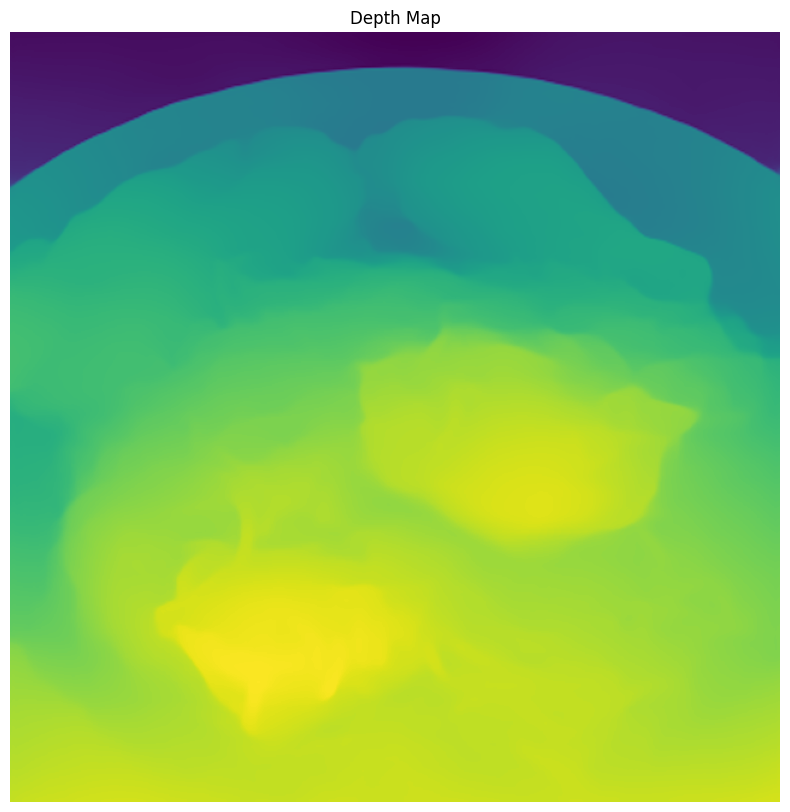

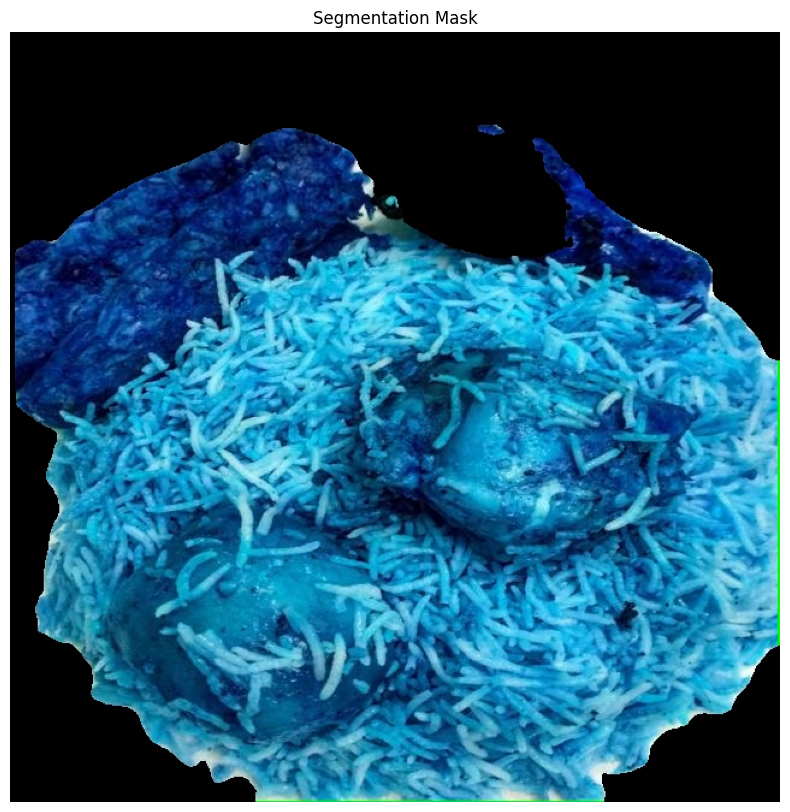

Depth map shape: (640, 640)
Segmentation mask shape: (640, 640)
[Open3D WARNING] GLFW Error: WGL: Failed to make context current: The requested transformation operation is not supported. 
[Open3D WARNING] GLFW Error: WGL: Failed to make context current: The handle is invalid. 
[Open3D WARNING] GLFW Error: WGL: Failed to make context current: The requested transformation operation is not supported. 
[Open3D WARNING] [ViewControl] SetViewPoint() failed because window height and width are not set.
Estimated volume: 0.000634 cubic meters (634.38 cubic centimeters)


In [46]:
import numpy as np
import open3d as o3d
import cv2
import matplotlib.pyplot as plt

# Function to visualize images
def show_image(title, image, cmap='gray'):
    plt.figure(figsize=(10, 10))
    plt.title(title)
    plt.imshow(image, cmap=cmap)
    plt.axis('off')
    plt.show()

# Load the depth map and segmentation mask
depth_map_path = r"C:\Users\Anuj\Documents\depth_map.png"
segmentation_mask_path = r"C:\Users\Anuj\Documents\segmented_image.jpg"

depth_map = cv2.imread(depth_map_path, cv2.IMREAD_UNCHANGED)
segmentation_mask = cv2.imread(segmentation_mask_path, cv2.IMREAD_UNCHANGED)

# Resize segmentation mask to match depth map dimensions
segmentation_mask = cv2.resize(segmentation_mask, (depth_map.shape[1], depth_map.shape[0]), interpolation=cv2.INTER_NEAREST)

show_image("Depth Map", depth_map, cmap='viridis')
show_image("Segmentation Mask", segmentation_mask, cmap='gray')

# Ensure the mask is binary
if segmentation_mask.ndim == 3:
    segmentation_mask = cv2.cvtColor(segmentation_mask, cv2.COLOR_BGR2GRAY)
segmentation_mask = (segmentation_mask > 0).astype(np.uint8)

# Check dimensions
print(f"Depth map shape: {depth_map.shape}")
print(f"Segmentation mask shape: {segmentation_mask.shape}")

# Function to convert depth map to 3D point cloud
def depth_map_to_point_cloud(depth_map, mask, focal_length, cx, cy):
    h, w = depth_map.shape
    i, j = np.indices((h, w))
    z = depth_map / 255.0  # Depth values should be normalized properly
    x = (j - cx) * z / focal_length
    y = (i - cy) * z / focal_length
    points = np.stack((x, y, z), axis=-1).reshape(-1, 3)
    
    # Apply mask to keep only points within the segmentation mask
    mask_flat = mask.flatten()
    points = points[mask_flat > 0]
    
    return points

# Convert depth map to 3D point cloud
focal_length = 1000  # Example value, replace with your camera's focal length
cx, cy = depth_map.shape[1] / 2, depth_map.shape[0] / 2  # Principal point (assumed to be at the center)
points = depth_map_to_point_cloud(depth_map, segmentation_mask, focal_length, cx, cy)

# Create Open3D point cloud
pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(points)

# Voxelization
voxel_size = 0.002  # Voxel size in meters
voxel_grid = o3d.geometry.VoxelGrid.create_from_point_cloud(pcd, voxel_size=voxel_size)

# Visualize point cloud and voxel grid
o3d.visualization.draw_geometries([pcd], window_name="Point Cloud")
o3d.visualization.draw_geometries([voxel_grid], window_name="Voxel Grid")

# Estimate volume
def estimate_volume_from_voxel_grid(voxel_grid, voxel_size):
    num_voxels = len(voxel_grid.get_voxels())
    volume = num_voxels * (voxel_size ** 3)
    return volume

volume = estimate_volume_from_voxel_grid(voxel_grid, voxel_size)
volume_cm3 = volume * 1e6  # Convert cubic meters to cubic centimeters
print(f"Estimated volume: {volume:.6f} cubic meters ({volume_cm3:.2f} cubic centimeters)")
